In [1]:
print("hello")

hello


In [2]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data_set/Linear_regression_placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

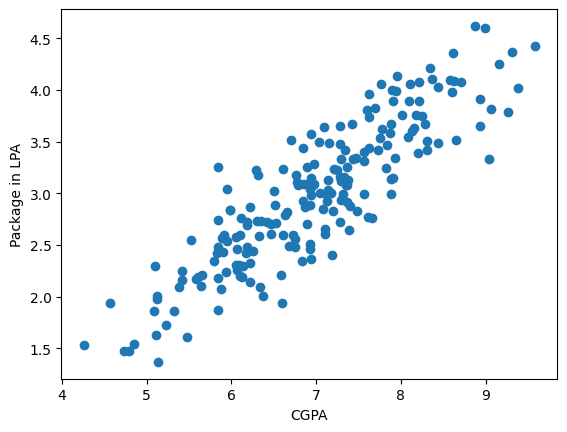

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [6]:
x = df.iloc[:,0:1]

In [7]:
y = df['package']
type(y)

pandas.core.series.Series

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(x_test)
print(y_pred)

[3.89111601 3.09324469 2.38464568 2.57434935 1.6537286  1.77647803
 2.07219258 2.93143862 3.76278706 2.93701814 4.09197872 3.51170867
 2.97049525 2.40138424 3.18809652 3.46707251 1.94386362 3.24389172
 2.97607477 3.41685683 2.55761079 3.16577844 2.85890486 3.12114229
 3.68467378 2.8700639  3.49497011 3.34432308 3.91901361 1.96060218
 3.65119666 3.2104146  3.74046898 2.7863711  2.78079158 3.27178932
 3.52844723 2.61340599 2.65804215 2.71383735]


Text(0, 0.5, 'Package in LPA')

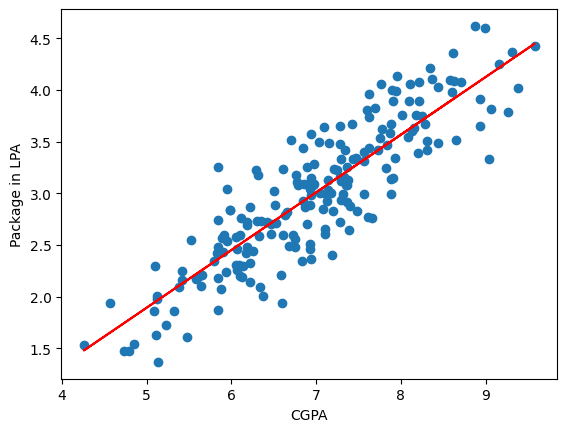

In [17]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [ ]:
# calculating the metrics score

In [20]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error, r2_score

In [21]:
print("The MSE is",mean_squared_error(y_test,y_pred),"LPA SQ")

The MSE is 0.12129235313495527 LPA SQ


In [22]:
print("The MAE is",mean_absolute_error(y_test,y_pred),"LPA")

The MAE is 0.2884710931878175 LPA


In [23]:
print("The RMSE is",np.sqrt(mean_squared_error(y_test,y_pred)))

The RMSE is 0.34827051717731616


In [24]:
r2 = r2_score(y_test,y_pred)

In [25]:
# adjusted r2_score
k = 1
numerator = ((1-r2)*(df.shape[0]-1))
denominator = (df.shape[0]-1-k)

adj_r2 = 1 - (numerator/denominator)
adj_r2

0.7796227240129617

In [26]:
# since the r2 and adjusted r2 has not very much or a lot of difference hence it is good

# Lets try implementing the thing by adding a just random Feature

In [27]:
new_df = df.copy()

In [31]:
new_df['random_feature'] = np.random.random(200)

Text(0, 0.5, 'Package(in lpa)')

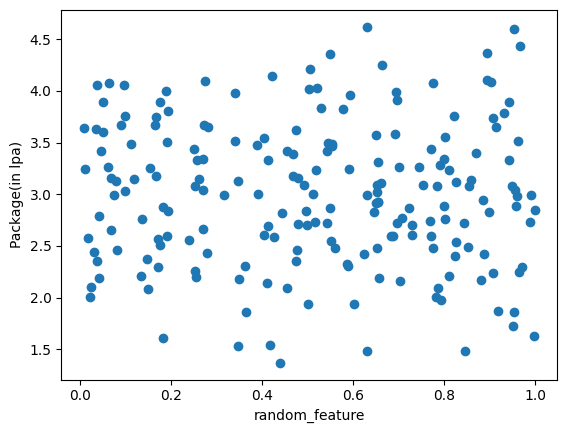

In [50]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [34]:
x = new_df[['cgpa','random_feature']]
x

,cgpa,random_feature
0,6.89,0.744216
1,5.12,0.793150
2,7.82,0.152693
3,7.42,0.164023
4,6.94,0.649830
...,...,...
195,6.93,0.476050
196,5.89,0.170221
197,7.21,0.590711
198,7.63,0.592353


In [35]:
y = new_df['package']

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
new_lr = LinearRegression()

In [39]:
new_lr.fit(x_test,y_test)

LinearRegression()

In [40]:
new_r2_score = r2_score(y_test , new_lr.predict(x_test))

In [41]:
new_r2_score

0.7909863387132512

In [47]:
num = (1-new_r2_score)*(new_df.shape[0]-1)
deno = (new_df.shape[0]-1-2)

In [ ]:
adj_r2 = 1 - num/deno

In [49]:
print("The adjusted r2 value is",adj_r2)

The adjusted r2 value is 0.2111356273911828


# trying with a relevant_feature ig

In [52]:
new_df = df.copy()

In [ ]:
new_df['iq'] = np.random.randint(-12,12,200)/200

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
